In [316]:
#imports
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt


In [317]:
#estimators
from sklearn.ensemble import RandomForestRegressor

In [318]:
from sklearn.linear_model import LinearRegression

In [319]:
from sklearn.svm import SVR
from sklearn import linear_model

In [320]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [321]:
#cross validation
from sklearn.cross_validation import train_test_split

In [322]:
#data

In [323]:
rawData = pd.read_csv('C:\default of credit card clients.csv', header=1)

In [324]:
rawData = rawData.rename(columns={'default payment next month':'default'})

In [325]:
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [326]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [327]:
rawData.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [328]:
#Select Features

In [329]:
features = rawData.iloc[:, 12:23]

In [330]:
print('Summary of feature sample')

Summary of feature sample


In [331]:
features.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [332]:
#select dependent variables

In [333]:
depVar = rawData['AGE']

In [334]:
depVar.head()

0    24
1    26
2    34
3    37
4    57
Name: AGE, dtype: int64

In [335]:
depVar.head()

0    24
1    26
2    34
3    37
4    57
Name: AGE, dtype: int64

In [336]:
#Establish the training set for the X-variables of Feature space (first 1000 rows: only for this example you will still follow a 70/30 split for the finl models)

In [337]:
X_train = (features[: 1000])

In [338]:
X_train.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [339]:
# Establish the training set for the Y-variable or dependent variable (the number of rows much match the X-training set)

In [340]:
#Dependent Variable Training Set (Y Training)

In [341]:
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:', str(y_train_count))

The number of observations in the Y training set are: 1000


In [342]:
y_train.head()

0    24
1    26
2    34
3    37
4    57
Name: AGE, dtype: int64

In [343]:
#Testing Set (X Testing)

In [344]:
X_test = depVar[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:', str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
29900    29
29901    29
29902    30
29903    30
29904    30
Name: AGE, dtype: int64


In [345]:
# Establish Ground Truth

In [346]:
#Ground Truth (y_test)

In [347]:
y_test = depVar[-100:]

In [348]:
y_test_count = len(y_test.index)

In [349]:
print('The number of observations in the Y training set are:', str(y_test_count))

The number of observations in the Y training set are: 100


In [350]:
y_test.head()

29900    29
29901    29
29902    30
29903    30
29904    30
Name: AGE, dtype: int64

In [351]:
#Cross Validation

In [352]:
from sklearn.cross_validation import train_test_split

In [353]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [354]:
X_train.shape, X_test.shape

((750, 11), (250, 11))

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [356]:
X_train.shape, X_test.shape

((562, 11), (188, 11))

In [357]:
from sklearn.linear_model import LinearRegression

In [358]:
model = LinearRegression(n_jobs=10)

In [359]:
#models

In [360]:
modelSVR = SVR()

In [361]:
modelRF = RandomForestRegressor()

In [362]:
modelLR = LinearRegression()

In [363]:
#features

In [364]:
features = rawData.iloc[:, 12:23]

In [365]:
print('Summary of Feature Sample')

Summary of Feature Sample


In [366]:
features.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [367]:
#dependent variable

In [368]:
print(depVar)

0        24
1        26
2        34
3        37
4        57
5        37
6        29
7        23
8        28
9        35
10       34
11       51
12       41
13       30
14       29
15       23
16       24
17       49
18       49
19       29
20       39
21       39
22       26
23       40
24       23
25       23
26       27
27       30
28       47
29       26
         ..
29970    34
29971    36
29972    37
29973    35
29974    37
29975    41
29976    47
29977    34
29978    39
29979    32
29980    42
29981    44
29982    36
29983    44
29984    38
29985    30
29986    35
29987    34
29988    34
29989    35
29990    41
29991    34
29992    43
29993    38
29994    34
29995    39
29996    43
29997    37
29998    41
29999    46
Name: AGE, Length: 30000, dtype: int64


In [369]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [370]:
#Random Forest

In [371]:
modelRF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [372]:
#Support Vector Regression

In [373]:
modelSVR.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [374]:
modelLR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [375]:
from sklearn.model_selection import cross_val_score

In [376]:
#Random Forest Regression Model Fitting and Scoring

In [377]:
#Model Fitting

In [378]:
modelRF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [379]:
print(cross_val_score(modelRF, X_train, y_train))

[-0.15877818 -0.09306462 -0.26619515]


In [380]:
#Support Vector Regression Model Fitting and Scoring

In [381]:
modelSVR.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [382]:
print(cross_val_score(modelSVR, X_train, y_train))

[-0.02579323 -0.05000934 -0.05857624]


In [383]:
modelRF.score(X_train, y_train)

0.7716268483703348

In [384]:
modelRF.score(X_test, y_test)

-0.051578764758800855

In [385]:
modelSVR.score(X_train, y_train)

0.11679851972123245

modelSVR.score(X_test, y_test)

In [386]:
#Linear Regression Model Fitting and Scoring

In [387]:
modelLR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [388]:
print(cross_val_score(modelLR, X_train, y_train))

[-0.07179429 -0.01413069 -0.01349927]


In [389]:
modelLR.score(X_train, y_train)

0.02767949654017643

In [390]:
modelLR.score(X_test, y_test)

0.018559498488597725

In [391]:
#Making Predictions

In [392]:
predictions_RF = modelRF.predict(X_test)

In [393]:
predictions_SVR = modelSVR.predict(X_test)

In [394]:
predictions_LR = modelLR.predict(X_test)

In [395]:
#Evaluating the results

In [396]:
from sklearn.metrics import mean_squared_error

In [397]:
from sklearn.metrics import r2_score

In [398]:
from math import sqrt

In [399]:
rmse_RF=sqrt(mean_squared_error(y_test, predictions_RF))

In [400]:
rmse_SVR=sqrt(mean_squared_error(y_test, predictions_SVR))

In [401]:
rmse_LR=sqrt(mean_squared_error(y_test, predictions_LR))

In [402]:
predRsquared_RF = r2_score(y_test, predictions_RF)

In [403]:
predRsquared_SVR = r2_score(y_test, predictions_SVR)

In [404]:
predRsquared_LR = r2_score(y_test, predictions_LR)

In [405]:
print('R Squared_RF: %.3f' % predRsquared_RF)

R Squared_RF: -0.052


In [406]:
print('R Squared_SVR: %.3f' % predRsquared_SVR)

R Squared_SVR: -0.053


In [407]:
print('R Squared_LR: %.3f' % predRsquared_LR)

R Squared_LR: 0.019


In [408]:
print('RMSE_RF: %.3f' % rmse_RF)

RMSE_RF: 9.590


In [409]:
print('RMSE_SVR: %.3f' % rmse_SVR)

RMSE_SVR: 9.598


In [410]:
print('RMSE_LR: %.3f' % rmse_LR)

RMSE_LR: 9.265


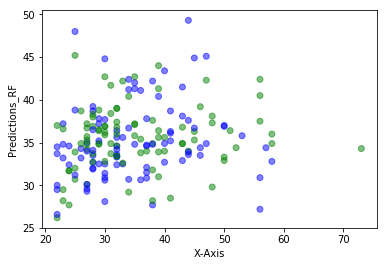

In [411]:
plt.scatter(y_test, predictions_RF, color=['blue','green'], alpha = 0.5)
plt.xlabel('X-Axis')
plt.ylabel('Predictions_RF')
plt.show();

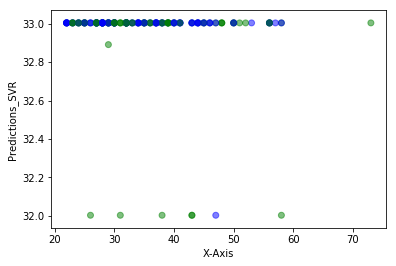

In [412]:
plt.scatter(y_test, predictions_SVR, color=['blue','green'], alpha = 0.5)
plt.xlabel('X-Axis')
plt.ylabel('Predictions_SVR')
plt.show();

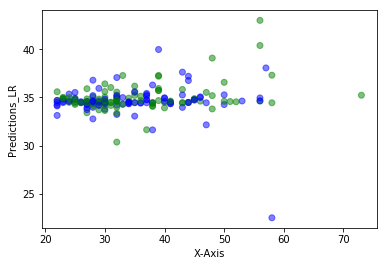

In [413]:
plt.scatter(y_test, predictions_LR, color=['blue','green'], alpha = 0.5)
plt.xlabel('X-Axis')
plt.ylabel('Predictions_LR')
plt.show();

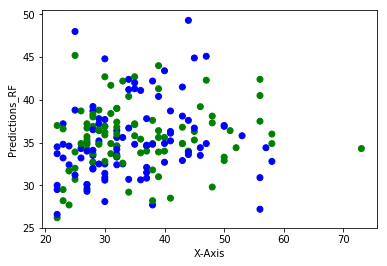

In [414]:
plt.scatter(y_test, predictions_RF, color=['blue','green'], alpha = 1.0)
plt.xlabel('X-Axis')
plt.ylabel('Predictions_RF')
plt.show();

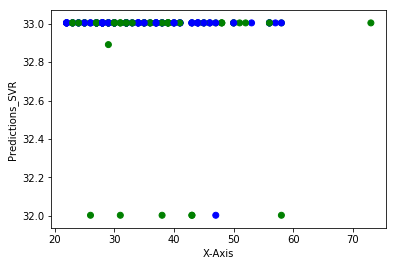

In [415]:
plt.scatter(y_test, predictions_SVR, color=['blue','green'], alpha = 1.0)
plt.xlabel('X-Axis')
plt.ylabel('Predictions_SVR')
plt.show();

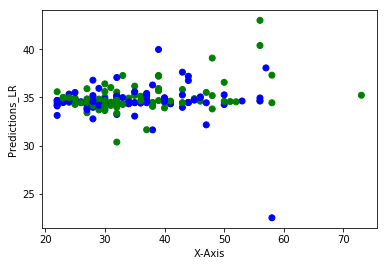

In [416]:
plt.scatter(y_test, predictions_LR, color=['blue','green'], alpha = 1.0)
plt.xlabel('X-Axis')
plt.ylabel('Predictions_LR')
plt.show();

In [417]:
rawData.cov()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,7.500250e+07,2.941664e+07,78.356379,268.154338,-131.452515,1491.057019,-297.572636,-116.276959,-191.692156,-27.691323,...,2.248126e+07,8.795803e+06,8.628506e+06,1.397501e+06,1.677383e+06,5.969803e+06,1.057334e+06,8.629502e+04,4.618460e+05,-50.151705
LIMIT_BAL,2.941664e+07,1.683446e+10,1571.050630,-22474.028945,-7323.669658,173076.722569,-39545.930009,-46037.648360,-44432.253315,-40571.811859,...,2.453926e+09,2.331481e+09,2.243837e+09,4.195711e+08,5.333504e+08,4.801180e+08,4.131202e+08,4.305657e+08,5.065153e+08,-8267.551759
SEX,7.835638e+01,1.571051e+03,0.239247,0.005502,-0.008014,-0.409726,-0.031685,-0.041442,-0.038694,-0.034411,...,-6.884896e+02,-5.056943e+02,-4.874302e+02,-1.964266e+00,-1.567550e+01,-7.403481e+01,-1.708011e+01,-1.245881e+01,-2.405188e+01,-0.008113
EDUCATION,2.681543e+02,-2.247403e+04,0.005502,0.624651,-0.059184,1.275380,0.093584,0.115025,0.107861,0.100528,...,-2.294883e+01,-3.635777e+02,-4.282742e+02,-4.903302e+02,-5.470050e+02,-5.558343e+02,-4.732070e+02,-4.873359e+02,-5.226734e+02,0.009187
MARRIAGE,-1.314525e+02,-7.323670e+03,-0.008014,-0.059184,0.272452,-1.992764,0.011683,0.015122,0.020421,0.020213,...,-7.838816e+02,-8.058409e+02,-6.592233e+02,-5.169161e+01,-9.732797e+01,-3.254608e+01,-1.035182e+02,-9.607709e+00,-6.162327e+01,-0.005273
AGE,1.491057e+03,1.730767e+05,-0.409726,1.275380,-1.992764,84.969755,-0.408639,-0.553408,-0.585263,-0.535851,...,3.045311e+04,2.765407e+04,2.613765e+04,3.992042e+03,4.626862e+03,4.746824e+03,3.087324e+03,3.218052e+03,3.191904e+03,0.053143
PAY_0,-2.975726e+02,-3.954593e+04,-0.031685,0.093584,0.011683,-0.408639,1.262930,0.904330,0.772384,0.707972,...,1.295025e+04,1.234167e+04,1.184476e+04,-1.475495e+03,-1.815138e+03,-1.396168e+03,-1.126848e+03,-9.991077e+02,-1.172194e+03,0.151499
PAY_2,-1.162770e+02,-4.603765e+04,-0.041442,0.115025,0.015122,-0.553408,0.904330,1.433254,1.098371,0.926680,...,1.711630e+04,1.611095e+04,1.564288e+04,-1.600241e+03,-1.627192e+03,-1.178331e+03,-8.788439e+02,-6.784685e+02,-7.768350e+02,0.130960
PAY_3,-1.916922e+02,-4.443225e+04,-0.038694,0.107861,0.020421,-0.585263,0.772384,1.098371,1.432492,1.087761,...,1.749410e+04,1.638295e+04,1.584709e+04,2.566847e+01,-1.841953e+03,-1.123429e+03,-8.637622e+02,-6.557960e+02,-7.630260e+02,0.116867
PAY_4,-2.769132e+01,-4.057181e+04,-0.034411,0.100528,0.020213,-0.535851,0.707972,0.926680,1.087761,1.366885,...,1.849642e+04,1.726555e+04,1.665159e+04,-1.812956e+02,-5.235817e+01,-1.425205e+03,-7.960357e+02,-5.999916e+02,-5.521373e+02,0.105115


In [418]:
covariance_matrix = np.cov(rawData, rowvar=0)

In [419]:
covariance_matrix

array([[ 7.50025000e+07,  2.94166409e+07,  7.83563785e+01,
         2.68154338e+02, -1.31452515e+02,  1.49105702e+03,
        -2.97572636e+02, -1.16276959e+02, -1.91692156e+02,
        -2.76913230e+01, -2.17860029e+02, -2.01877379e+02,
         1.23644654e+07,  1.10839192e+07,  1.46268798e+07,
         2.24812643e+07,  8.79580299e+06,  8.62850636e+06,
         1.39750097e+06,  1.67738345e+06,  5.96980287e+06,
         1.05733431e+06,  8.62950175e+04,  4.61846047e+05,
        -5.01517051e+01],
       [ 2.94166409e+07,  1.68344557e+10,  1.57105063e+03,
        -2.24740289e+04, -7.32366966e+03,  1.73076723e+05,
        -3.95459300e+04, -4.60376484e+04, -4.44322533e+04,
        -4.05718119e+04, -3.66705623e+04, -3.50930834e+04,
         2.72701997e+09,  2.57013019e+09,  2.54853316e+09,
         2.45392576e+09,  2.33148108e+09,  2.24383722e+09,
         4.19571137e+08,  5.33350409e+08,  4.80117965e+08,
         4.13120196e+08,  4.30565689e+08,  5.06515298e+08,
        -8.26755176e+03],
    

In [423]:
import seaborn as sns

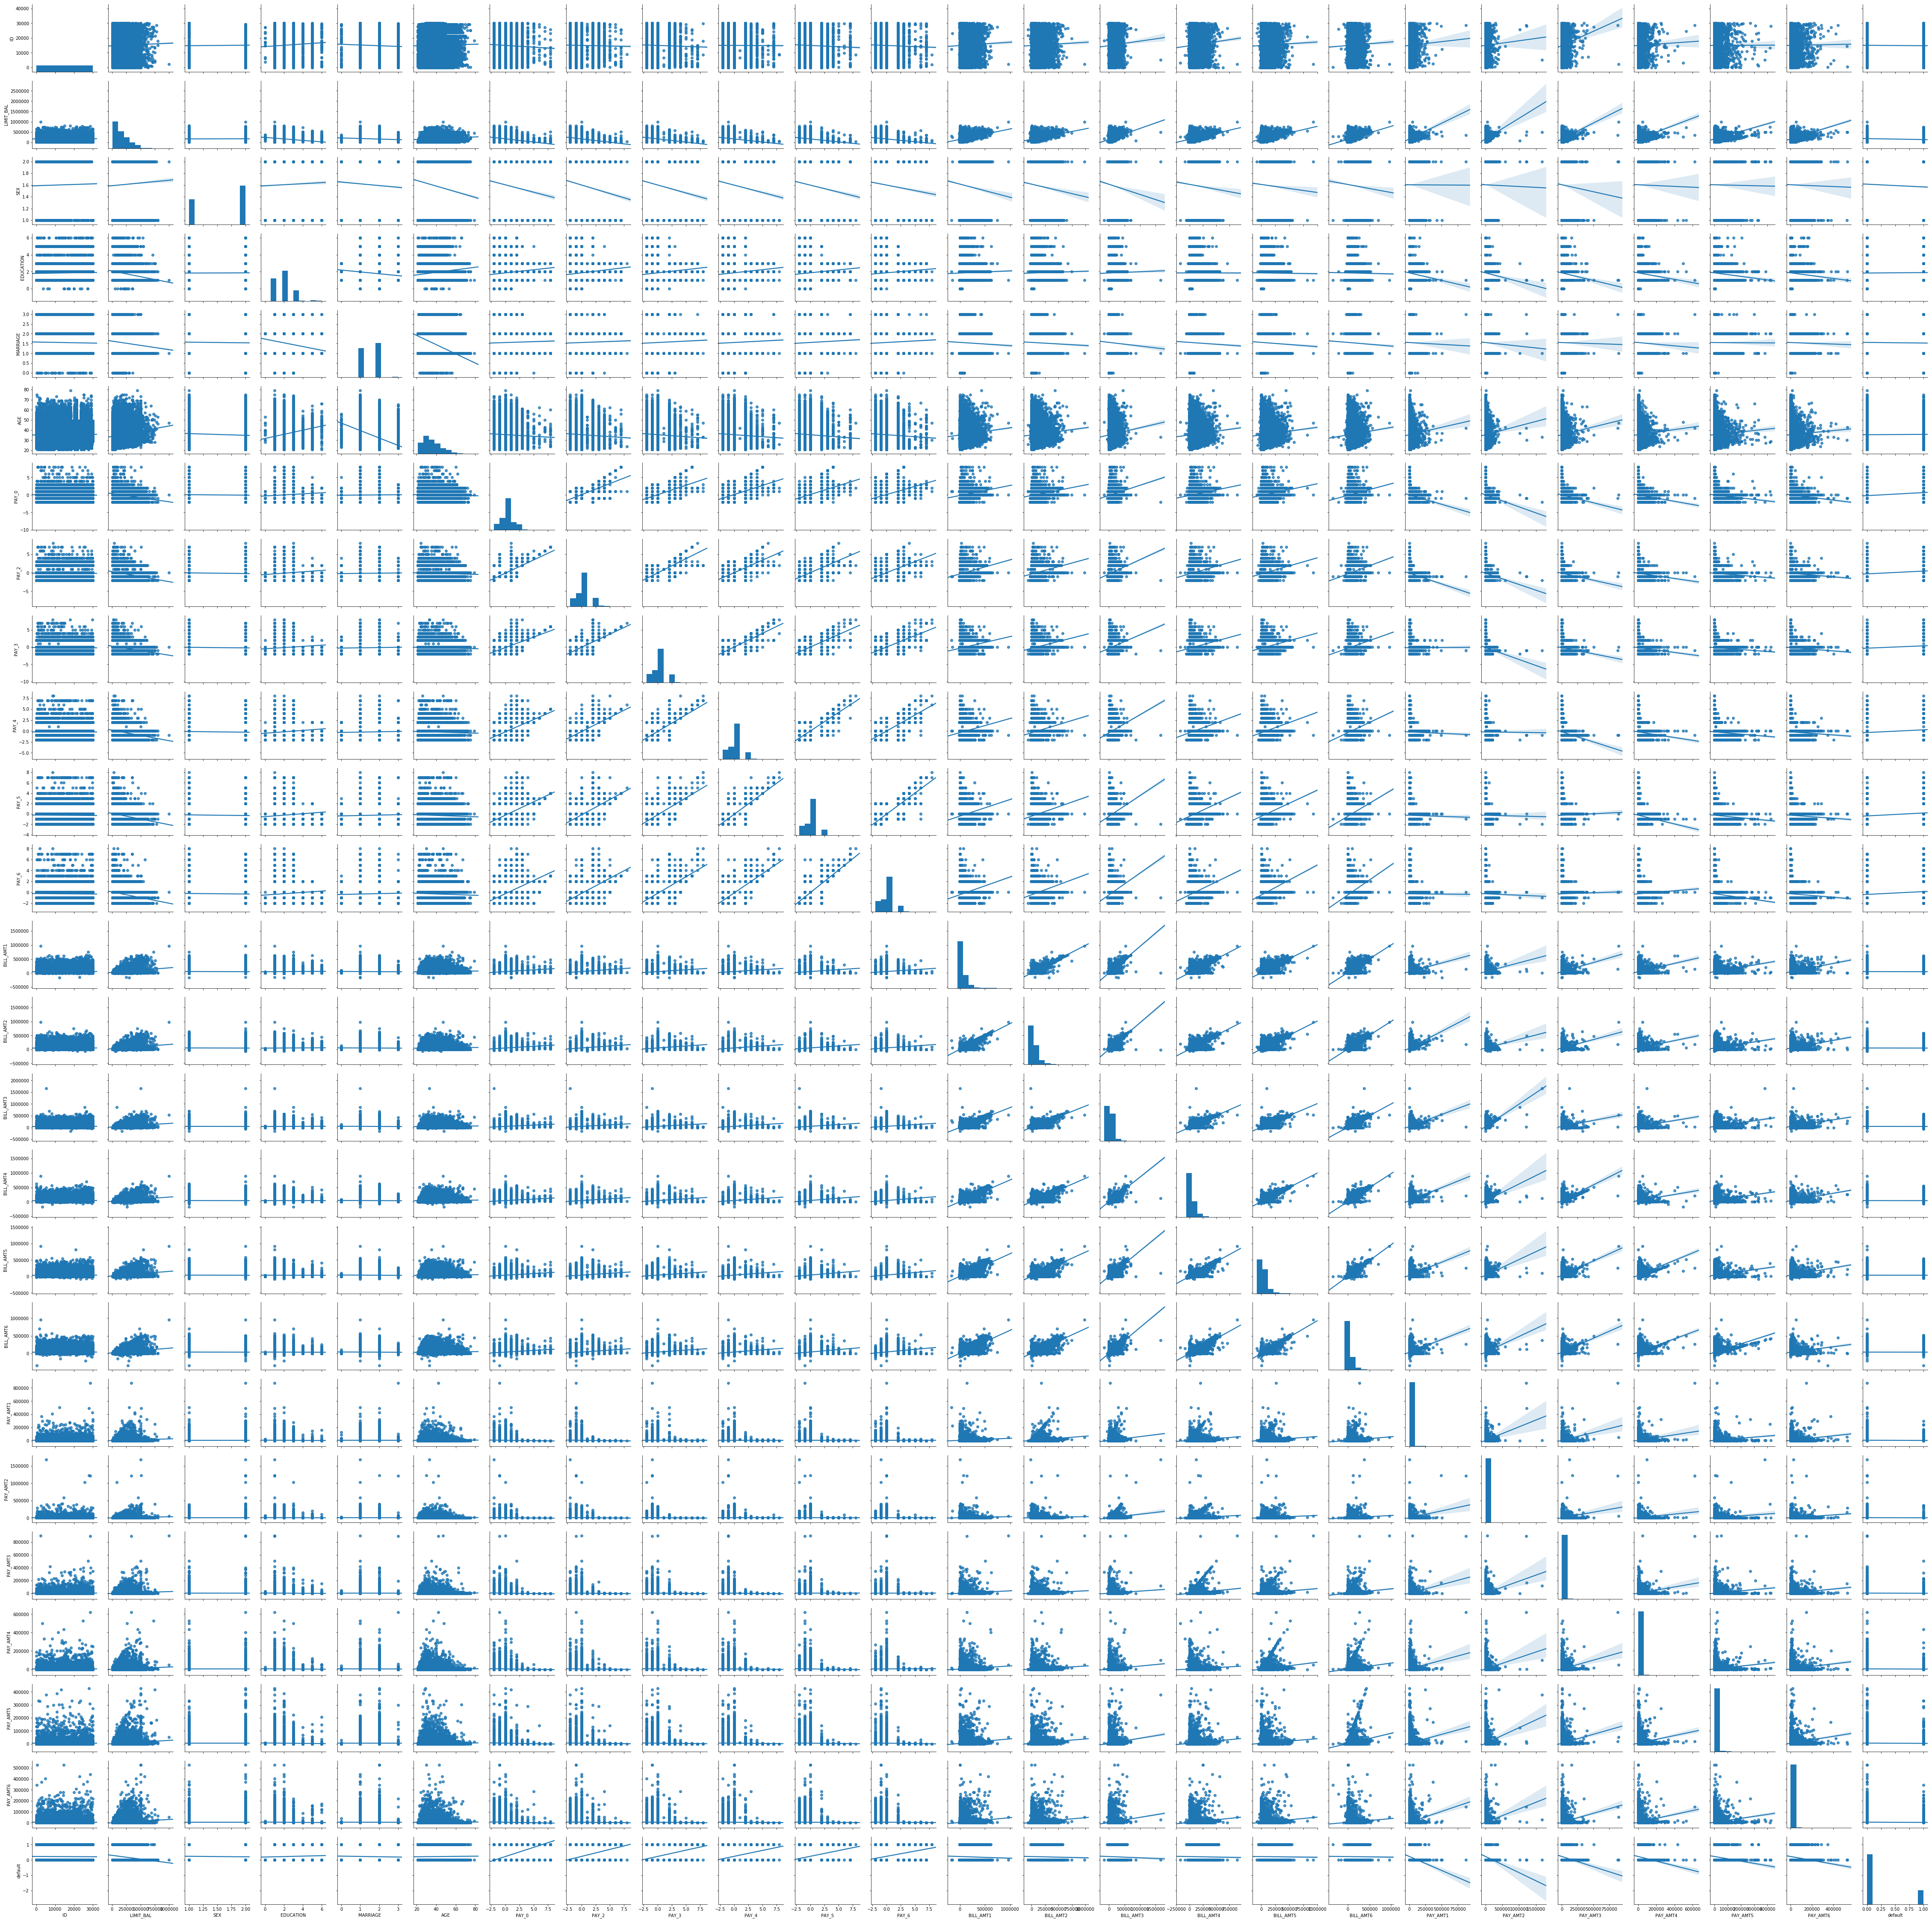

In [424]:
sns.pairplot(rawData, kind='reg')

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(rawData, kind='reg')

In [ ]:
# Covariance measures how much 2x variables change together

In [ ]:
# The Overall probability of default payment can be expressed as

In [ ]:
rawData.default payment next month.sum() / len(rawData.default payment next month)

In [ ]:
rawData = rawData.rename(columns={'default payment next month':'default'})

In [ ]:
rawData.info()

In [ ]:
rawData.default.sum() / len(rawData.default)

In [ ]:
corr = rawData.drop('ID', axis=1).corr()
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmin=0, vmax=1, center=0, square=True, linewidth=0.5)

In [ ]:
corrf = features.corr()
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmin=0, vmax=1, center=0, square=True, linewidth=0.5)